   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

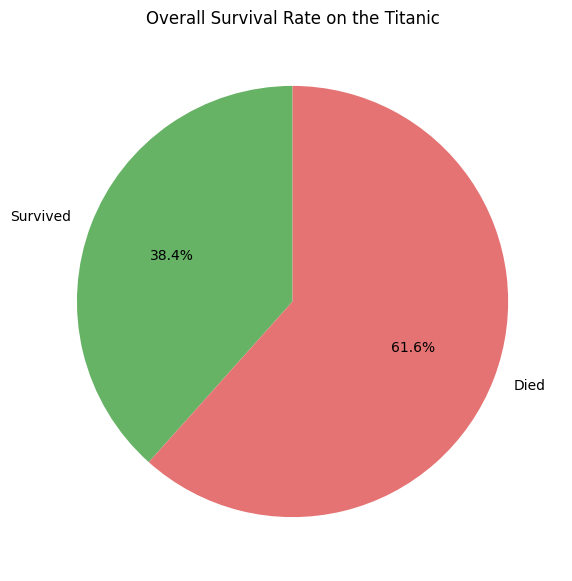

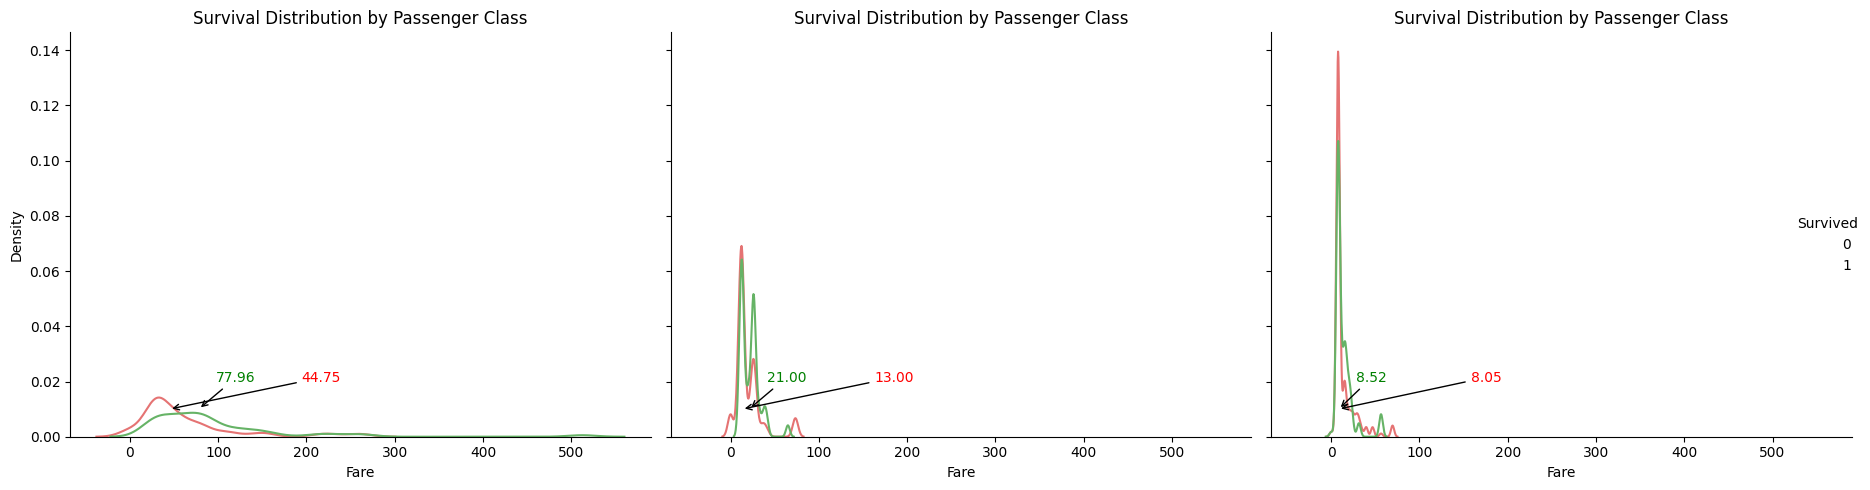

C:\Users\Michelle Wong\AppData\Local\Temp\ipykernel_26816\1452560695.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts_female = df_female.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)
C:\Users\Michelle Wong\AppData\Local\Temp\ipykernel_26816\1452560695.py:119: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts_male = df_male.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)


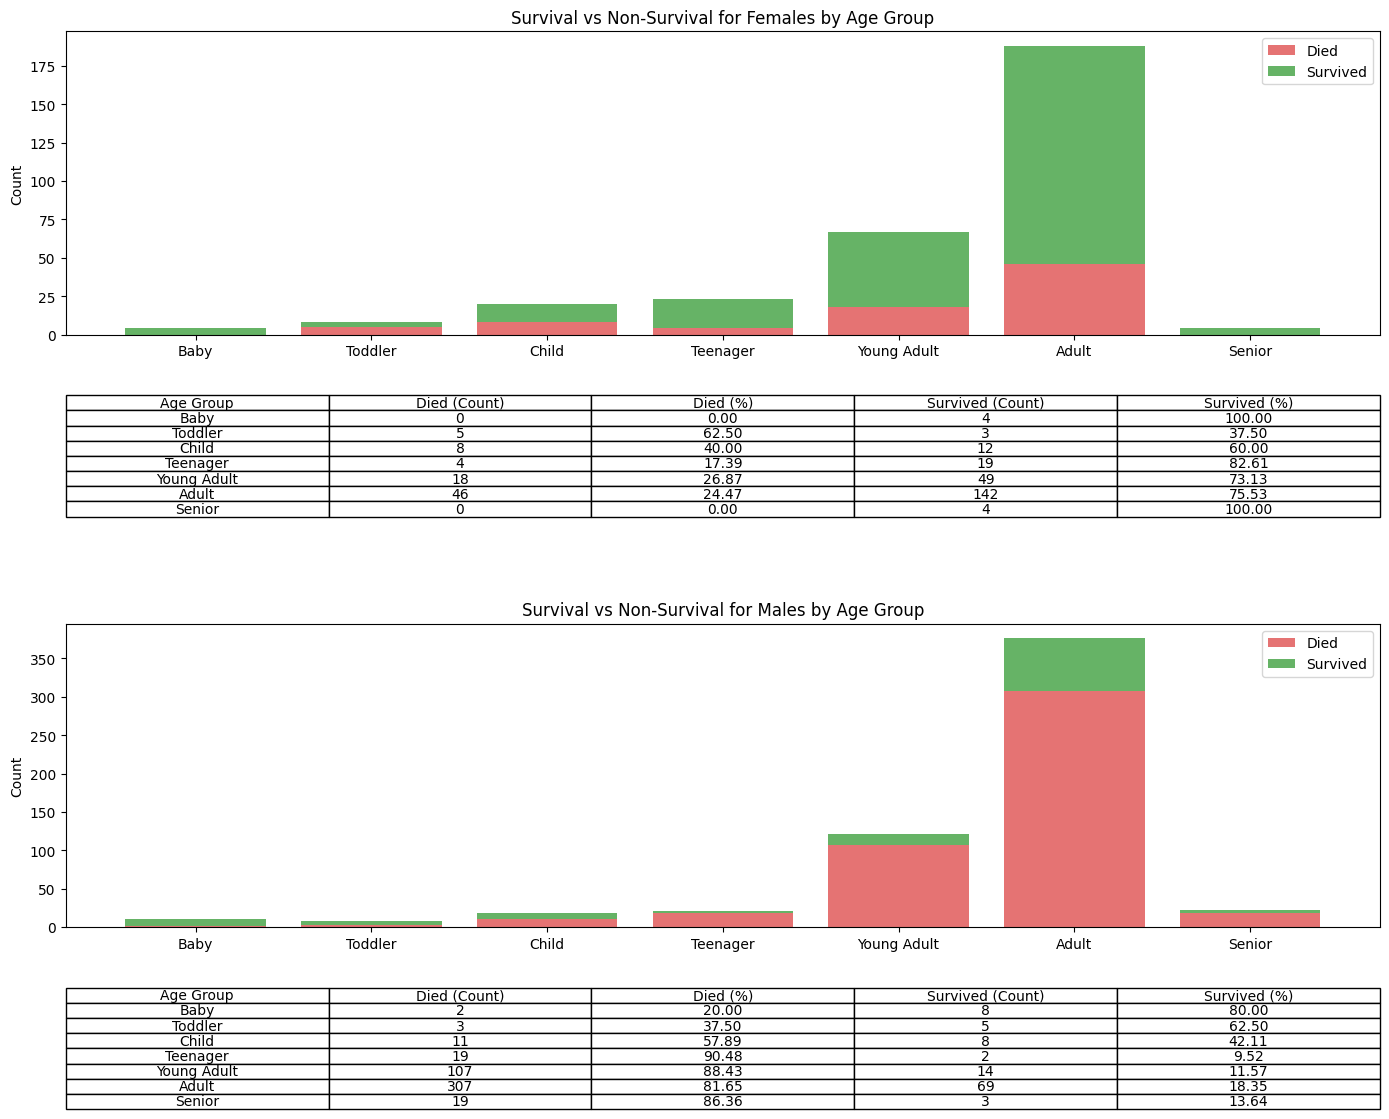

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
   SibSp  Parch  Family
0      1      0       1
1      1      0       1
2      0      0       0
3      1      0       1
4      0      0       0


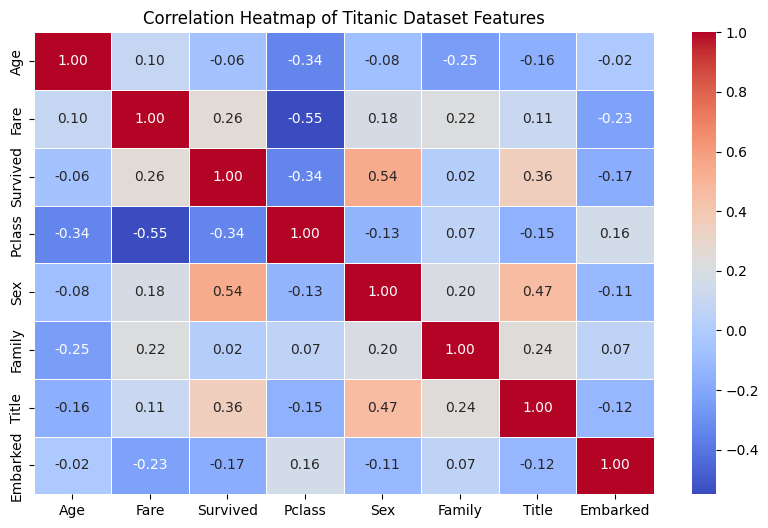

In [1]:
# Titanic Survival Analysis

import pandas as pd
# Data Processing & Cleaning
# Load the Titanic dataset
df = pd.read_csv(r'C:\Users\Michelle Wong\Desktop\GitHub Projects\Titanic\train.csv')

# Check the first few rows of the dataset
print(df.head())

# Confirm data types
df.info()

# Check for Missing Data
missing_values = df.isnull().sum()
print("Missing values in each column: ")
print(missing_values)

# Handle Missing Data
# Missing Values for 'Age' by filling with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Missing Values for 'Fare' by filling with the median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Verify if Missing Values are handled or not
print("Missing Values After Handling: ")
print(df.isnull().sum())

# Create Age Group for easier categorisation and comparison
age_bins = [0, 1, 3, 12, 17, 25, 59, float('inf')]
age_labels = ['Baby', 'Toddler', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Create New Column 'AgeGroup' 
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Check the New Column
print(df[['Age', 'AgeGroup']].head())


# Titanic Survival Analysis

# 1. What is the Overall Survival Rate on the Titanic?

import matplotlib.pyplot as plt

# Calculate Survival Rate
survived_count = df['Survived'].value_counts()
survival_rate = survived_count[1] / (survived_count[0] + survived_count[1])
#### Visualise the Survival Rate with Pie Chart
survival_data = [survival_rate, 1 - survival_rate]
labels = ['Survived', 'Died']

# Create Pie Chart
plt.figure(figsize=(7,7))
plt.pie(survival_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b366', '#e57373'])
plt.title('Overall Survival Rate on the Titanic')
plt.show()


# 2. How does the Survival Rate Vary by Passenger Class and Fare?

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a FacetGrid to plot KDE for Each Passenger Class
g = sns.FacetGrid(df, col="Pclass", hue="Survived", height=5, aspect=1.2)

# Iterate through Axes and Plot KDE
for ax, pclass in zip(g.axes.flat, g.col_names): 
    ax.set_title("Survival Distribution by Passenger Class")  
    ax.set_xlabel("Fare")
    ax.set_ylabel("Density")
    
    pclass = int(pclass)
    
    # Filter Data based on Pclass and Survived Status
    survival_0_data = df[(df['Pclass'] == pclass) & (df['Survived'] == 0)]['Fare'].dropna()
    survival_1_data = df[(df['Pclass'] == pclass) & (df['Survived'] == 1)]['Fare'].dropna()
    
    # Use KDE or Histogram if KDE fails
    if len(survival_0_data) > 1 and len(survival_1_data) > 1:
        kde_0 = sns.kdeplot(survival_0_data, ax=ax, label="Died", color="#e57373", fill=False, bw_adjust=0.5)
        kde_1 = sns.kdeplot(survival_1_data, ax=ax, label="Survived", color="#66b366", fill=False, bw_adjust=0.5)
    
    # Annotations for KDE Plots
        # Annotating Median Fare for Died and Survived
        median_0 = survival_0_data.median()  
        median_1 = survival_1_data.median()  
        
    # Annotate the Median Values for Died and Survived
        ax.annotate(f"{median_0:.2f}", xy=(median_0, 0.01), xytext=(median_0 + 150, 0.02),
                    arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10, color='red')
        ax.annotate(f"{median_1:.2f}", xy=(median_1, 0.01), xytext=(median_1 + 20, 0.02),
                    arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, color='green')
        
    else:
        sns.histplot(survival_0_data, ax=ax, label="Died", color="#e57373", bins=20, kde=True)
        sns.histplot(survival_1_data, ax=ax, label="Survived", color="#66b366", bins=20, kde=True)

# Add the legend to each subplot
g.add_legend()

plt.tight_layout()
plt.show()


# 3. Survival vs Died by Age Group and Gender

# Group by Age Group and Survival Status for females and males
df_female = df[df['Sex'] == 'female']
df_male = df[df['Sex'] == 'male']

# Group the data by AgeGroup and Survived, and get the counts for females
survival_counts_female = df_female.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Group the data by AgeGroup and Survived, and get the counts for males
survival_counts_male = df_male.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Extract counts for Died and Survived
died_counts_female = survival_counts_female.get(0, 0)
survived_counts_female = survival_counts_female.get(1, 0)

died_counts_male = survival_counts_male.get(0, 0)
survived_counts_male = survival_counts_male.get(1, 0)

# Calculate Percentages
def calculate_percentage(counts, total_counts):
    return (counts / total_counts) * 100

# Total counts per AgeGroup
female_total = survival_counts_female.sum(axis=1)
male_total = survival_counts_male.sum(axis=1)

# Calculate percentages for females
female_died_percentage = calculate_percentage(survival_counts_female[0], female_total).round(2)
female_survived_percentage = calculate_percentage(survival_counts_female[1], female_total).round(2)

# Calculate percentages for males
male_died_percentage = calculate_percentage(survival_counts_male[0], male_total).round(2)
male_survived_percentage = calculate_percentage(survival_counts_male[1], male_total).round(2)

# Prepare data for tables
female_died_percentage = female_died_percentage.apply(lambda x: f'{x:.2f}')
female_survived_percentage = female_survived_percentage.apply(lambda x: f'{x:.2f}')
male_died_percentage = male_died_percentage.apply(lambda x: f'{x:.2f}')
male_survived_percentage = male_survived_percentage.apply(lambda x: f'{x:.2f}')

# DataFrames for females and males
female_table_data = pd.DataFrame({
    'Age Group': survival_counts_female.index,
    'Died (Count)': survival_counts_female[0],
    'Died (%)': female_died_percentage,
    'Survived (Count)': survival_counts_female[1],
    'Survived (%)': female_survived_percentage
})

male_table_data = pd.DataFrame({
    'Age Group': survival_counts_male.index,
    'Died (Count)': survival_counts_male[0],
    'Died (%)': male_died_percentage,
    'Survived (Count)': survival_counts_male[1],
    'Survived (%)': male_survived_percentage
})

# Plot the figures
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Female bar plot
axes[0].bar(survival_counts_female.index, died_counts_female, color='#e57373', label='Died')
axes[0].bar(survival_counts_female.index, survived_counts_female, bottom=died_counts_female, color='#66b366', label='Survived')
axes[0].set_title('Survival vs Non-Survival for Females by Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(loc='upper right')
axes[0].table(cellText=female_table_data.values, colLabels=female_table_data.columns, loc='bottom', cellLoc='center', colLoc='center', bbox=[0.0, -0.6, 1.0, 0.4])

# Male bar plot
axes[1].bar(survival_counts_male.index, died_counts_male, color='#e57373', label='Died')
axes[1].bar(survival_counts_male.index, survived_counts_male, bottom=died_counts_male, color='#66b366', label='Survived')
axes[1].set_title('Survival vs Non-Survival for Males by Age Group')
axes[1].set_ylabel('Count')
axes[1].legend(loc='upper right')
axes[1].table(cellText=male_table_data.values, colLabels=male_table_data.columns, loc='bottom', cellLoc='center', colLoc='center', bbox=[0.0, -0.6, 1.0, 0.4])

plt.tight_layout()
plt.show()



# 4. Correlation Heatmap
import re

# Modify the Features before create the Correlation Heatmap
# Extract the Title from Name
df['Title'] = df['Name'].apply(lambda x: re.search(r' ([A-Za-z]+)\.', x).group(1))
print(df['Title'].unique())

# Combine 'SibSp' and 'Parch' into 'Family'
df['Family'] = df['SibSp'] + df['Parch']
print(df[['SibSp', 'Parch', 'Family']].head())

# Convert categorical columns into numerical ones
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df['Title'] = df['Title'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Dr': 4, 'Rev': 5, 'Col': 6, 'Major': 7, 'Mlle': 8, 'Ms': 9, 'Lady': 10, 'Sir': 11, 'Don': 12, 'Dona': 13})  # Example mapping

# Select relevant numerical features for correlation matrix
features = ['Age', 'Fare', 'Survived', 'Pclass', 'Sex', 'Family', 'Title', 'Embarked']
correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()